## 필요한 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
import sklearn.metrics as m
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve,auc

## 데이터 불러오기 및 정제

In [ ]:
spec = pd.read_csv('user_spec.csv')
result = pd.read_csv('loan_result.csv')

In [ ]:
result.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [ ]:
# 대출 승인이 된 데이터들만 불러오기
result1 = result[result['is_applied']==1]
result1.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
13304,2136706,2022-05-09 10:41:06,23,236,37000000.0,9.9,1.0
13309,2136706,2022-05-09 10:41:18,62,200,14000000.0,9.3,1.0
13314,2136706,2022-05-09 10:41:06,1,61,13000000.0,8.9,1.0
13383,679142,2022-05-09 13:39:36,47,47,12000000.0,6.7,1.0


In [ ]:
result1.shape

(560449, 7)

In [ ]:
spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [ ]:
# result에서 대출 승인이 된 데이터들의 스펙 불러오가
df = pd.merge(left = result1 , right = spec, how = "left", on = "application_id")

In [ ]:
df.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,346970.0,1970.0,1.0,...,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0
1,2136706,2022-05-09 10:41:06,23,236,37000000.0,9.9,1.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0
2,2136706,2022-05-09 10:41:18,62,200,14000000.0,9.3,1.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0
3,2136706,2022-05-09 10:41:06,1,61,13000000.0,8.9,1.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0
4,679142,2022-05-09 13:39:36,47,47,12000000.0,6.7,1.0,68769.0,1998.0,0.0,...,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,0.0,NaN,3.0,36000000.0


In [ ]:
df = df.set_index(['user_id'])
loanapply_insert_time_max= df.groupby(['user_id'])['loanapply_insert_time'].max().tolist()
df = df[df['loanapply_insert_time'].isin(loanapply_insert_time_max)]
df.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,birth_year,gender,insert_time,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
user_id,,,,,,,,,,,,,,,,,,,,,
346970.0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,1970.0,1.0,2022-05-09 08:44:57,...,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0
68769.0,679142,2022-05-09 13:39:37,40,261,12000000.0,6.5,1.0,1998.0,0.0,2022-05-09 13:39:36,...,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,0.0,NaN,3.0,36000000.0
561011.0,1831090,2022-05-09 09:03:36,49,136,9000000.0,6.5,1.0,1988.0,1.0,2022-05-09 09:03:13,...,EARNEDINCOME,202202.0,정규직,전월세,1000000.0,생활비,0.0,0.0,6.0,16000000.0
253258.0,1637434,2022-05-09 17:33:25,52,234,30000000.0,3.9,1.0,1994.0,1.0,2022-05-09 17:33:24,...,EARNEDINCOME,202101.0,정규직,전월세,50000000.0,생활비,0.0,0.0,NaN,NaN
253258.0,1637434,2022-05-09 17:33:27,4,268,37000000.0,5.7,1.0,1994.0,1.0,2022-05-09 17:33:24,...,EARNEDINCOME,202101.0,정규직,전월세,50000000.0,생활비,0.0,0.0,NaN,NaN


In [ ]:
df.shape

(202575, 22)

In [ ]:
df.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,birth_year,gender,insert_time,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
user_id,,,,,,,,,,,,,,,,,,,,,
346970.0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,1970.0,1.0,2022-05-09 08:44:57,...,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0
68769.0,679142,2022-05-09 13:39:37,40,261,12000000.0,6.5,1.0,1998.0,0.0,2022-05-09 13:39:36,...,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,0.0,NaN,3.0,36000000.0
561011.0,1831090,2022-05-09 09:03:36,49,136,9000000.0,6.5,1.0,1988.0,1.0,2022-05-09 09:03:13,...,EARNEDINCOME,202202.0,정규직,전월세,1000000.0,생활비,0.0,0.0,6.0,16000000.0
253258.0,1637434,2022-05-09 17:33:25,52,234,30000000.0,3.9,1.0,1994.0,1.0,2022-05-09 17:33:24,...,EARNEDINCOME,202101.0,정규직,전월세,50000000.0,생활비,0.0,0.0,NaN,NaN
253258.0,1637434,2022-05-09 17:33:27,4,268,37000000.0,5.7,1.0,1994.0,1.0,2022-05-09 17:33:24,...,EARNEDINCOME,202101.0,정규직,전월세,50000000.0,생활비,0.0,0.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 202575 entries, 346970.0 to 601384.0
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   application_id                       202575 non-null  int64  
 1   loanapply_insert_time                202575 non-null  object 
 2   bank_id                              202575 non-null  int64  
 3   product_id                           202575 non-null  int64  
 4   loan_limit                           199805 non-null  float64
 5   loan_rate                            199805 non-null  float64
 6   is_applied                           202575 non-null  float64
 7   birth_year                           200291 non-null  float64
 8   gender                               200291 non-null  float64
 9   insert_time                          202570 non-null  object 
 10  credit_score                         175434 non-null  float64
 11  ye

## 관련없는 특성 제거

In [ ]:
df.drop(['application_id','bank_id','product_id','application_id', 'birth_year', 'gender', 'loanapply_insert_time', 'is_applied'],axis=1,inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 202575 entries, 346970.0 to 601384.0
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_limit                           199805 non-null  float64
 1   loan_rate                            199805 non-null  float64
 2   insert_time                          202570 non-null  object 
 3   credit_score                         175434 non-null  float64
 4   yearly_income                        202570 non-null  float64
 5   income_type                          202570 non-null  object 
 6   company_enter_month                  180571 non-null  float64
 7   employment_type                      202570 non-null  object 
 8   houseown_type                        202570 non-null  object 
 9   desired_amount                       202570 non-null  float64
 10  purpose                              202570 non-null  object 
 11  pe

## company_enter_month 파생변수 만들기

In [ ]:
# 날짜형으로 변환
df['company_enter_month'] = df['company_enter_month'].fillna(-1)
df['company_enter_month'] = df['company_enter_month'].astype(int).astype(str)

In [ ]:
df['company_enter_month'] = df['company_enter_month'].apply(lambda x : x[:-2]  if len(x)>=8 else x)
df['company_enter_month'] = df['company_enter_month'].replace('-1',np.nan)
df['company_enter_month']= pd.to_datetime(df['company_enter_month'],format='%Y%m')

In [ ]:
# insert 타임에서의 연차 계산
def diff_month2(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [ ]:
df['insert_time'] = pd.to_datetime(df['insert_time'])

In [ ]:
df['company_month2'] = df.apply(lambda x: diff_month2(x.insert_time, x.company_enter_month), axis=1)

In [ ]:
df.head()

,loan_limit,loan_rate,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_month2
user_id,,,,,,,,,,,,,,,,
346970.0,20000000.0,16.5,2022-05-09 08:44:57,540.0,32000000.0,EARNEDINCOME,2013-12-01,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0,101.0
68769.0,12000000.0,6.5,2022-05-09 13:39:36,630.0,28000000.0,EARNEDINCOME,2021-10-01,정규직,전월세,10000000.0,생활비,0.0,NaN,3.0,36000000.0,7.0
561011.0,9000000.0,6.5,2022-05-09 09:03:13,650.0,40000000.0,EARNEDINCOME,2022-02-01,정규직,전월세,1000000.0,생활비,0.0,0.0,6.0,16000000.0,3.0
253258.0,30000000.0,3.9,2022-05-09 17:33:24,910.0,30000000.0,EARNEDINCOME,2021-01-01,정규직,전월세,50000000.0,생활비,0.0,0.0,NaN,NaN,16.0
253258.0,37000000.0,5.7,2022-05-09 17:33:24,910.0,30000000.0,EARNEDINCOME,2021-01-01,정규직,전월세,50000000.0,생활비,0.0,0.0,NaN,NaN,16.0


In [ ]:
df.drop(['company_enter_month','insert_time'],axis=1,inplace= True)

In [ ]:
df.isnull().sum()

loan_limit                               2770
loan_rate                                2770
credit_score                            27141
yearly_income                               5
income_type                                 5
employment_type                             5
houseown_type                               5
desired_amount                              5
purpose                                     5
personal_rehabilitation_yn              94529
personal_rehabilitation_complete_yn    177704
existing_loan_cnt                       44567
existing_loan_amt                       58101
company_month2                          22004
dtype: int64

## 가변수화

In [ ]:
df['purpose'].unique()

array(['생활비', '사업자금', '대환대출', '기타', '전월세보증금', 'SWITCHLOAN', '투자',
       'LIVING', 'ETC', '주택구입', '자동차구입', 'INVEST', 'BUYCAR', 'BUSINESS',
       'BUYHOUSE', 'HOUSEDEPOSIT', nan], dtype=object)

In [ ]:
# purpose 영어를 한국어로 변경
df.loc[(df['purpose']=='LIVING'),'purpose'] = '생활비'
df.loc[(df['purpose']=='SWITCHLOAN'),'purpose'] = '대환대출'
df.loc[(df['purpose']=='BUSINESS'),'purpose'] = '사업자금'
df.loc[(df['purpose']=='HOUSEDEPOSIT'),'purpose'] = '전월세보증금'
df.loc[(df['purpose']=='ETC'),'purpose'] = '기타'
df.loc[(df['purpose']=='BUYHOUSE'),'purpose'] = '주택구입'
df.loc[(df['purpose']=='INVEST'),'purpose'] = '투자'
df.loc[(df['purpose']=='BUYCAR'),'purpose'] = '자동차구입'

In [ ]:
df['purpose'].unique()

array(['생활비', '사업자금', '대환대출', '기타', '전월세보증금', '투자', '주택구입', '자동차구입', nan],
      dtype=object)

In [ ]:
df['income_type'].unique()

array(['EARNEDINCOME', 'PRACTITIONER', 'PRIVATEBUSINESS', 'FREELANCER',
       'EARNEDINCOME2', 'OTHERINCOME', nan], dtype=object)

In [ ]:
df['employment_type'].unique()

array(['정규직', '기타', '계약직', '일용직', nan], dtype=object)

In [ ]:
df['houseown_type'].unique()

array(['자가', '전월세', '기타가족소유', '배우자', nan], dtype=object)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 202575 entries, 346970.0 to 601384.0
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_limit                           199805 non-null  float64
 1   loan_rate                            199805 non-null  float64
 2   credit_score                         175434 non-null  float64
 3   yearly_income                        202570 non-null  float64
 4   desired_amount                       202570 non-null  float64
 5   personal_rehabilitation_yn           108046 non-null  float64
 6   personal_rehabilitation_complete_yn  24871 non-null   float64
 7   existing_loan_cnt                    158008 non-null  float64
 8   existing_loan_amt                    144474 non-null  float64
 9   company_month2                       180571 non-null  float64
 10  income_type_EARNEDINCOME             202575 non-null  uint8  
 11  in

## 결측치 처리(MICE)

In [ ]:
imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=5)
imputer
imputed_dataset = imputer.fit_transform(df)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
column_names = df.columns
imputed_dataset = pd.DataFrame(imputed_dataset, columns=column_names)
imputed_dataset.head()

,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_month2,...,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
0,20000000.0,16.5,540.0,32000000.0,10000000.0,0.0,-0.000334,12.000000,1.620000e+08,101.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,12000000.0,6.5,630.0,28000000.0,10000000.0,0.0,-0.000613,3.000000,3.600000e+07,7.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,9000000.0,6.5,650.0,40000000.0,1000000.0,0.0,0.000000,6.000000,1.600000e+07,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30000000.0,3.9,910.0,30000000.0,50000000.0,0.0,0.000000,2.801473,5.788489e+07,16.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37000000.0,5.7,910.0,30000000.0,50000000.0,0.0,0.000000,2.801473,5.788489e+07,16.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
imputed_dataset.isnull().sum()

loan_limit                             0
loan_rate                              0
credit_score                           0
yearly_income                          0
desired_amount                         0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
company_month2                         0
income_type_EARNEDINCOME               0
income_type_EARNEDINCOME2              0
income_type_FREELANCER                 0
income_type_OTHERINCOME                0
income_type_PRACTITIONER               0
income_type_PRIVATEBUSINESS            0
employment_type_계약직                    0
employment_type_기타                     0
employment_type_일용직                    0
employment_type_정규직                    0
houseown_type_기타가족소유                   0
houseown_type_배우자                      0
houseown_type_자가                       0
houseown_type_전월세                      0
purpose_기타      

## 표준화

In [ ]:
#표준화

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(imputed_dataset)


In [ ]:
column_names2 = imputed_dataset.columns
scaler_df = pd.DataFrame(scaler_df, columns=column_names2)
scaler_df.head()

,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_month2,...,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
0,0.016821,0.749847,0.185787,0.003368,0.0010,0.133307,0.016196,0.071522,0.021565,0.079216,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.010093,0.249949,0.223789,0.002947,0.0010,0.133307,0.015922,0.021183,0.004792,0.005490,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.007569,0.249949,0.232233,0.004211,0.0001,0.133307,0.016525,0.037962,0.002130,0.002353,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.025231,0.119975,0.342016,0.003158,0.0050,0.133307,0.016525,0.020072,0.007706,0.012549,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.031119,0.209957,0.342016,0.003158,0.0050,0.133307,0.016525,0.020072,0.007706,0.012549,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 변수 간 상관관계

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0

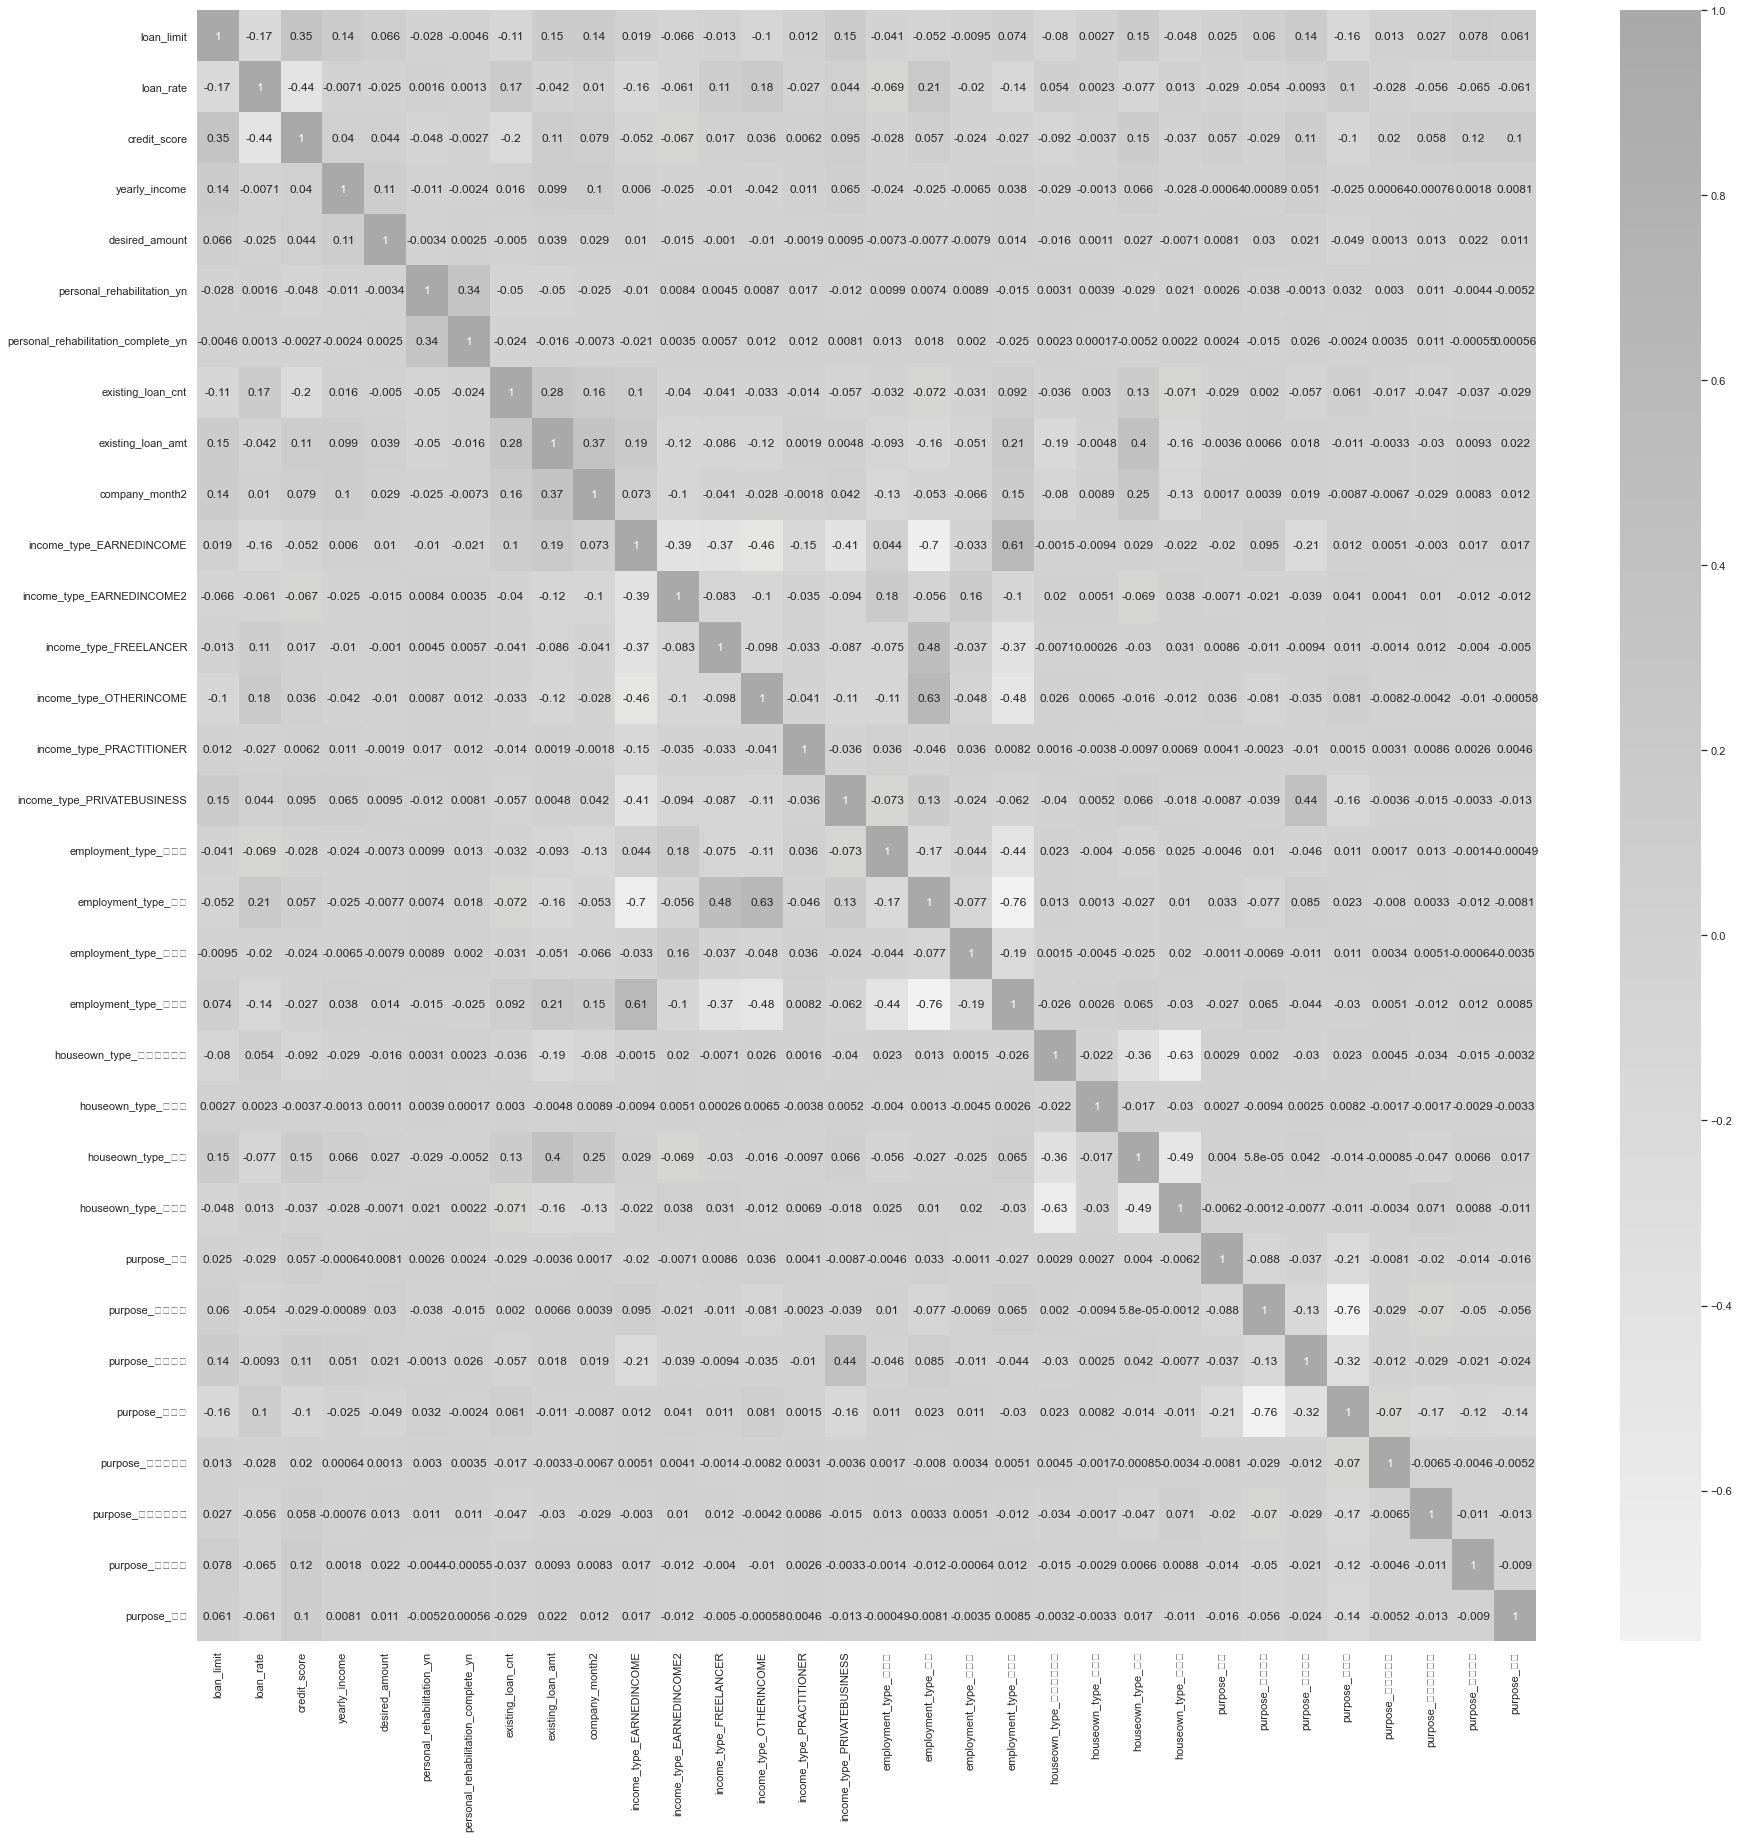

In [ ]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(scaler_df.corr(), annot=True, cmap=cmap)
plt.show()

#### KMeans 군집분석

- 적절한 군집수 (k) 찾기

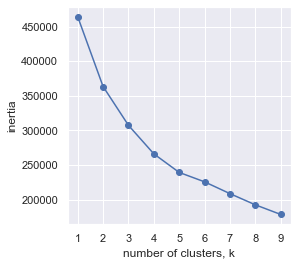

In [ ]:
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaler_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

##### 3개

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(scaler_df)

df_kmeans = imputed_dataset.copy()
df_kmeans['cluster'] = clusters.labels_
df_kmeans.head()

,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_month2,...,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자,cluster
0,20000000.0,16.5,540.0,32000000.0,10000000.0,0.0,-0.000334,12.000000,1.620000e+08,101.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,12000000.0,6.5,630.0,28000000.0,10000000.0,0.0,-0.000613,3.000000,3.600000e+07,7.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,9000000.0,6.5,650.0,40000000.0,1000000.0,0.0,0.000000,6.000000,1.600000e+07,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,30000000.0,3.9,910.0,30000000.0,50000000.0,0.0,0.000000,2.801473,5.788489e+07,16.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,37000000.0,5.7,910.0,30000000.0,50000000.0,0.0,0.000000,2.801473,5.788489e+07,16.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_kmeans.groupby('cluster').count()

,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_month2,income_type_EARNEDINCOME,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,income_type_PRIVATEBUSINESS,employment_type_계약직,employment_type_기타,employment_type_일용직,employment_type_정규직,houseown_type_기타가족소유,houseown_type_배우자,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265,47265
1,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286,71286
2,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024,84024


In [ ]:
cluster_mean= df_kmeans.groupby('cluster').mean()
cluster_mean

,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_month2,income_type_EARNEDINCOME,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,income_type_PRIVATEBUSINESS,employment_type_계약직,employment_type_기타,employment_type_일용직,employment_type_정규직,houseown_type_기타가족소유,houseown_type_배우자,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.871456e+07,13.571309,674.562748,3.877176e+07,2.427351e+07,0.012102,0.002188,4.070727,4.700778e+07,38.014223,0.019190,0.054395,0.301682,0.465588,0.003935,0.155104,0.003808,0.994965,0.001121,0.000000,0.329187,0.001269,0.200275,0.469163,0.033513,0.174505,0.087210,0.672189,0.001968,0.016058,0.005924,0.008526
1,2.000467e+07,11.332777,656.173067,4.186132e+07,2.607685e+07,0.012302,0.001055,4.370076,6.289227e+07,35.863109,0.810790,0.104481,0.002651,0.000561,0.017521,0.063996,0.128637,0.002048,0.028673,0.840642,0.000000,0.000000,0.000000,1.000000,0.021042,0.259364,0.039924,0.632775,0.002623,0.024942,0.009567,0.009763
2,2.169600e+07,11.279869,664.477029,5.007372e+07,2.898216e+07,0.009438,0.001018,4.895517,9.022868e+07,53.082861,0.830049,0.079120,0.001761,0.000750,0.015353,0.072967,0.108160,0.001059,0.020899,0.869882,0.582572,0.001857,0.415572,0.000000,0.021863,0.256272,0.043107,0.649755,0.003059,0.007177,0.007676,0.011092


## PCA 주성분을 사용하여 시각화

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


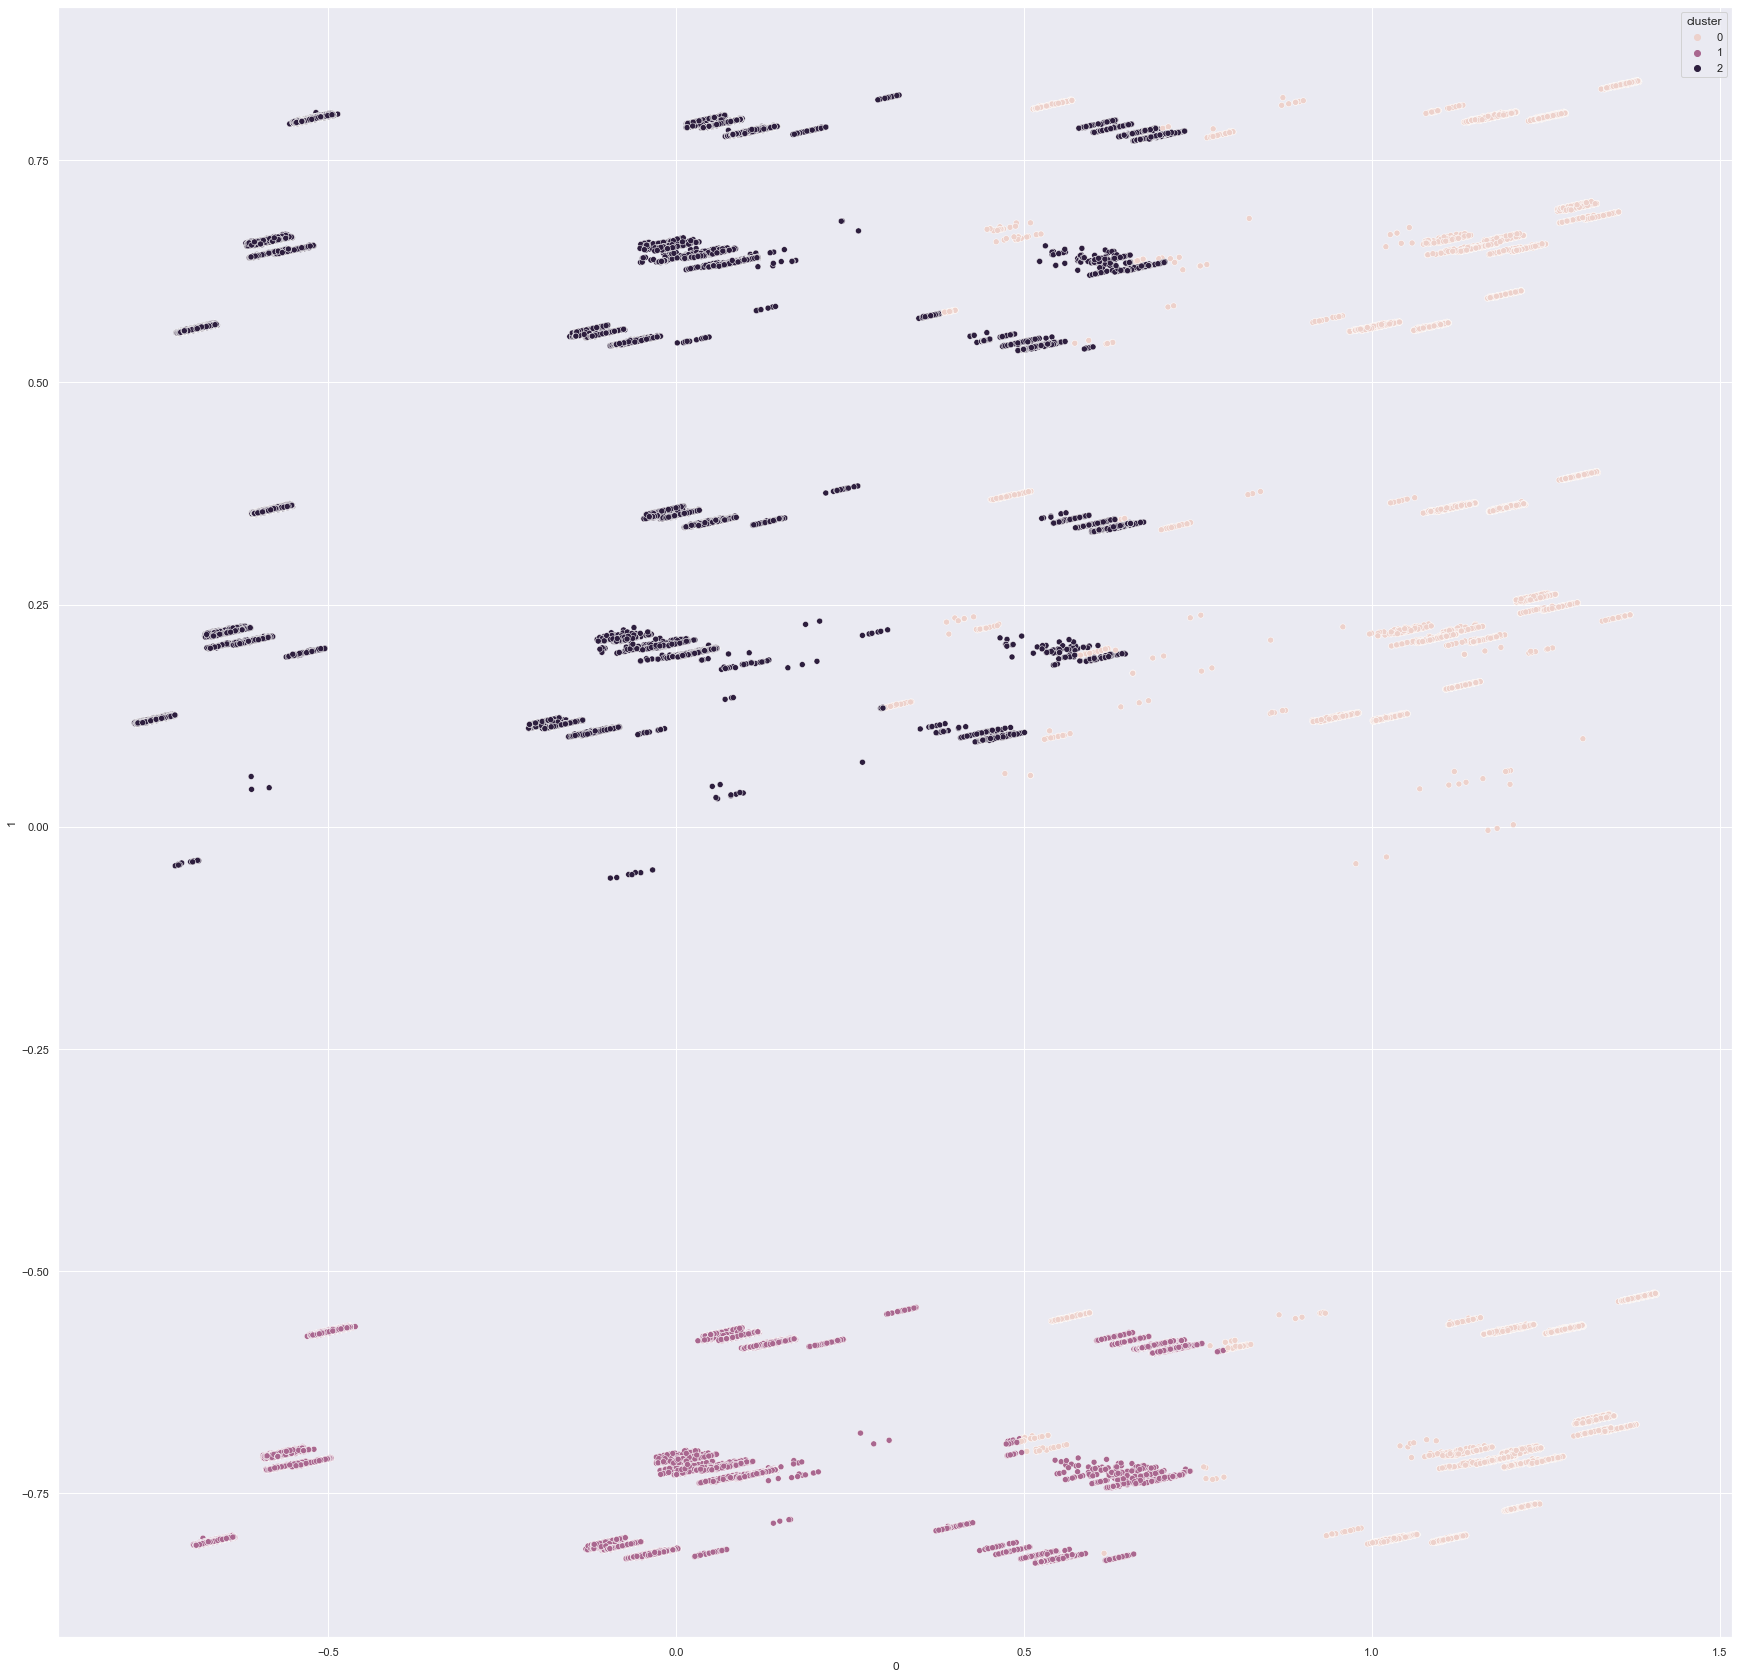

In [ ]:
#주성분 분석
from sklearn.decomposition import PCA
X=scaler_df.copy()

#객체
pca=PCA(n_components=3)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca


pca_df = pd.DataFrame(x_pca)
pca_df['cluster']=df_kmeans['cluster']


axs = plt.subplots()
axs = sns.scatterplot(0,1,hue='cluster',data=pca_df)